In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# GradientBoosting, is an ensemble model based on Boosting.

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

# Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

# Input, output, train, test

In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Trying Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=2, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_gb))

# Trying no of trees

In [ ]:
nc=np.arange(1,500,10)
acc=np.empty(50)
i=0
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=int(k), learning_rate=0.5, max_depth=2, random_state=42)
    gb_clf.fit(X_train, y_train)
    temp= gb_clf.score(X_test, y_test)
    acc[i]=temp
    i = i + 1
acc

## Finding number of tress for which we get highest accuracy

In [ ]:
nc[np.where(acc == np.amax(acc))]

# Varying the learning rate

In [ ]:
nc=np.arange(0.05,1.05,0.05)
acc=np.empty(20)
i=0
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=21, learning_rate=k, max_depth=2, random_state=42)
    gb_clf.fit(X_train, y_train)
    temp= gb_clf.score(X_test, y_test)
    acc[i]=temp
    i = i + 1
acc

# Finding the optimal learning rate

In [ ]:
nc[np.where(acc == np.amax(acc))]

# Varying the max features

In [ ]:
nc=np.arange(0.05,1.05,0.05)
acc=np.empty(20)
i=0
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=21, learning_rate=0.1, max_depth=2, max_features = k, random_state=42)
    gb_clf.fit(X_train, y_train)
    temp= gb_clf.score(X_test, y_test)
    acc[i]=temp
    i = i + 1
acc

# Finding the optimal max feature

In [ ]:
nc[np.where(acc == np.amax(acc))]

# Varying max depth

In [ ]:
nc=np.arange(1,6,1)
acc=np.empty(5)
i=0
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=21, learning_rate=0.1, max_features = 0.7, max_depth= k,random_state=42)
    gb_clf.fit(X_train, y_train)
    temp= gb_clf.score(X_test, y_test)
    acc[i]=temp
    i = i + 1
acc

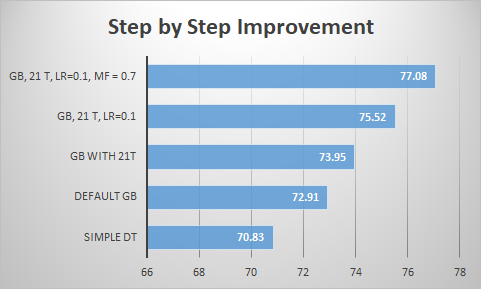